# _automaton_.has_bounded_lag

Check if the transducer has bounded lag, i.e. that the difference of length between the input and output words is bounded, for every word accepted.

It is a pre-condition for transducer synchronization.

Preconditions:
- The automaton has at least two tapes.

## Examples

In [1]:
import vcsn
ctx = vcsn.context("[ab] x [xy]")
ctx

[ab]? x [xy]? -> B

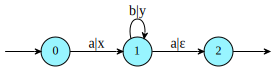

In [2]:
a = ctx.expression(r"'a,x''b,y'*'a,\e'").automaton()
a

This automaton has a bounded lag: there is at most a difference of 1 between the length of the input and the length of the output (e.g., $abba \rightarrow xyy$).

In [3]:
a.has_bounded_lag()

True

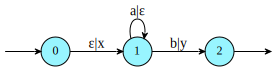

In [4]:
b = ctx.expression(r"(\e|x)(a|\e)*(b|y)").automaton()
b

This transducer, however, doesn't have a bounded lag: there can be an arbitrary large difference between the input and output. For example, $ab \rightarrow xy$, but $aaaaaaaaab \rightarrow xy$.

In [5]:
b.has_bounded_lag()

False

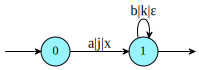

In [6]:
ctx_3 = vcsn.context("[ab] x [jk] x [xy]")
c = ctx_3.expression(r"(a|j|x)(b|k|\e)*").automaton()
c

In the case of more than 2 tapes, `has_bounded_lag` checks that every tape has a bounded lag compared to the first one (incidentally, if that is the case, it will insure that every tapes has a bounded lag in respect to every other). This transducer has a bounded lag if you only consider the first 2 tapes, but the third tape doesn't.

In [7]:
c.has_bounded_lag()

False